In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import the necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp Materials/Codes/Data and Programs ML/Data and Programs DTree/BreastCancer.csv",
                 index_col=['Code'])
dum_df = pd.get_dummies(df, drop_first=True)


In [ ]:
dum_df.head()

In [ ]:
X = dum_df.iloc[:,:9]
y = dum_df.iloc[:,9]

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state=2021,
                                                    stratify=y)


In [ ]:
dum_df['Class_Malignant'].value_counts(normalize=True)

In [8]:
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2021)

In [9]:
clf.feature_importances_

array([0.03232117, 0.03225037, 0.75901809, 0.02066388, 0.02624805,
       0.09580797, 0.00878008, 0.02491039, 0.        ])

In [10]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[134   4]
 [  7  65]]
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       138
        True       0.94      0.90      0.92        72

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210

0.9476190476190476


In [11]:
# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score


In [12]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]


In [13]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


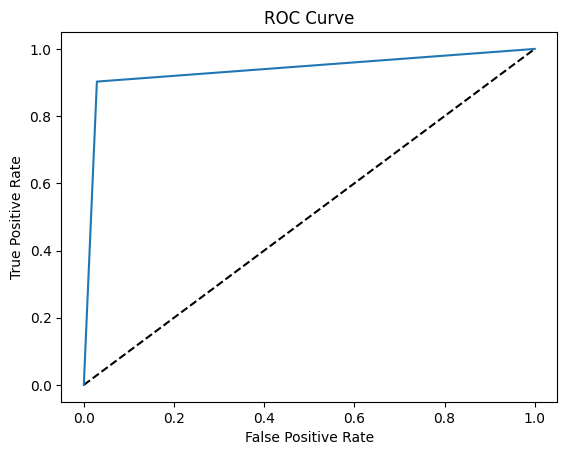

np.float64(0.9368961352657004)

In [14]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)


In [15]:
################################################################
import graphviz
from sklearn import tree


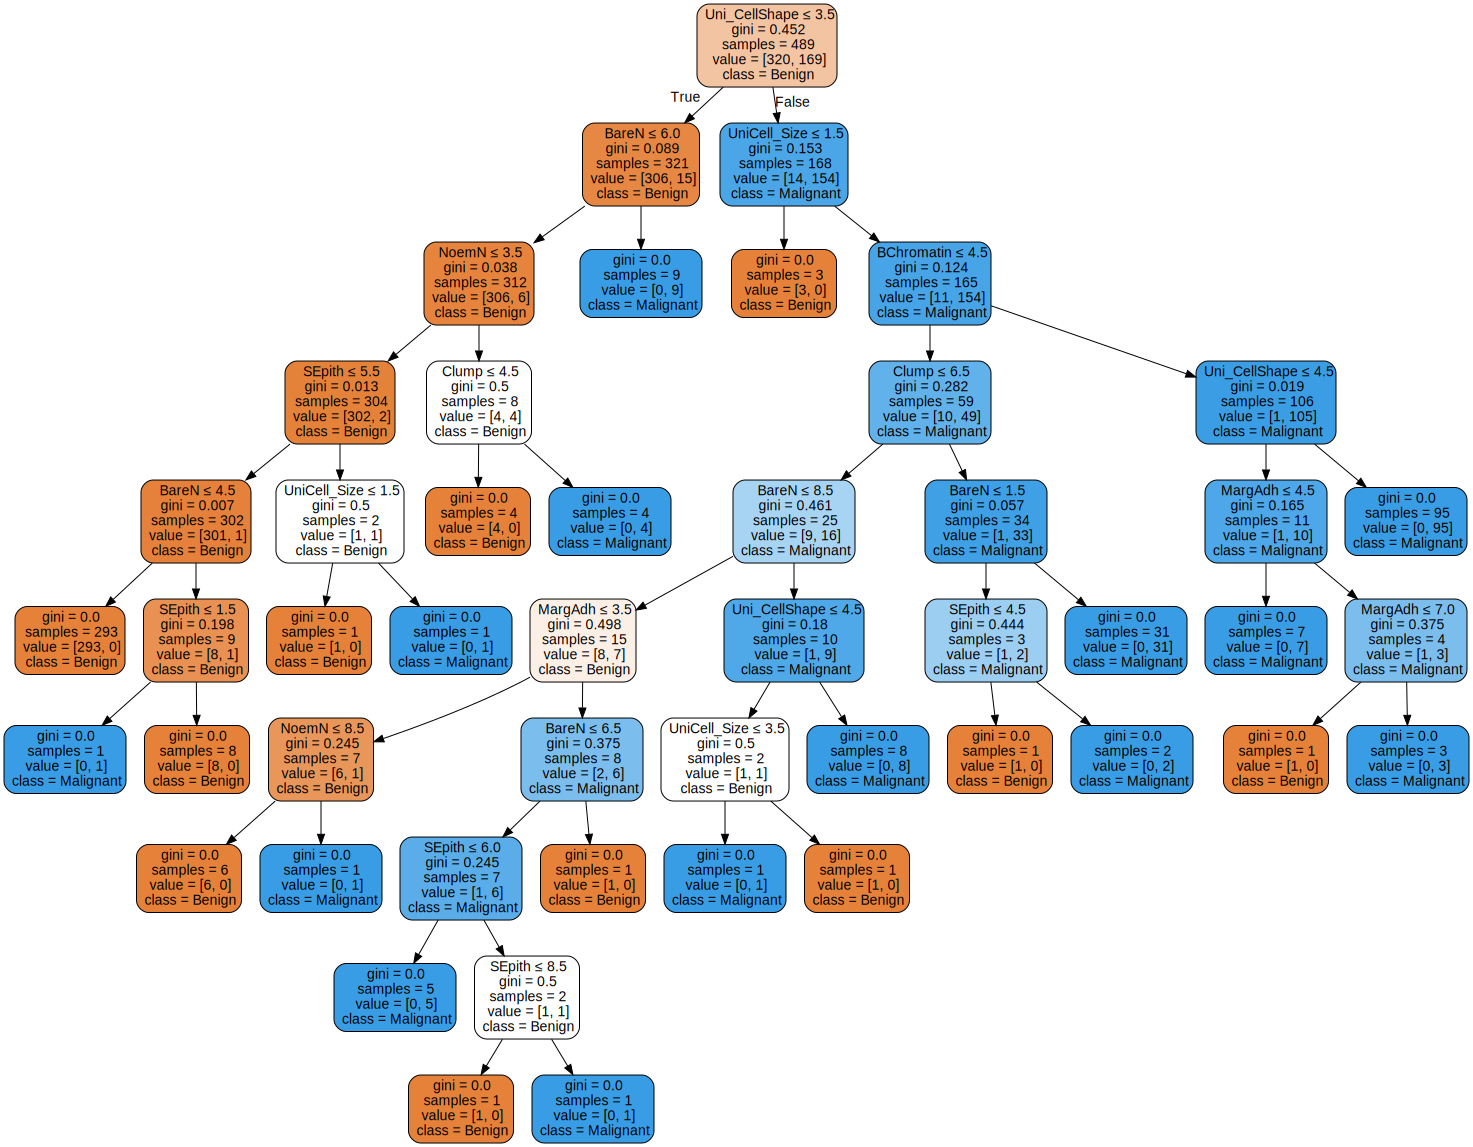

In [16]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=X_train.columns,
                         class_names=['Benign','Malignant'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [ ]:
# or


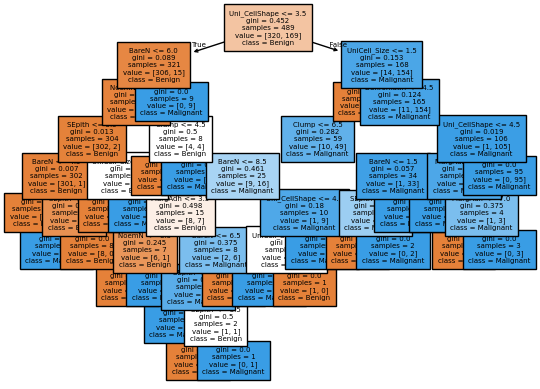

In [18]:
tree.plot_tree(clf,feature_names=X_train.columns,
               class_names=['Benign','Malignant'],
               filled=True,fontsize=5)
#######################Grid Search CV###########################
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]


In [19]:
parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range,
                  min_samples_leaf=minleaf_range)


In [20]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,
                        shuffle=True)


In [21]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=2021)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc',verbose=2)

In [22]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END max_depth=3, min_sam

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 20, 25, 30]},
             scoring='roc_auc', verbose=2)

In [23]:
# Viewing all parameter sets
df_cv = pd.DataFrame(cv.cv_results_)
df_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002979,0.001421,0.002824,0.000488,3,5,5,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.943474,0.997013,0.960478,0.979090,0.969934,0.969998,0.017925,95
1,0.002147,0.000055,0.002311,0.000066,3,5,10,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.943474,0.997013,0.960478,0.979090,0.969934,0.969998,0.017925,95
2,0.001955,0.000051,0.002136,0.000055,3,5,20,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.943474,0.997013,0.959099,0.978631,0.969934,0.969630,0.018033,97
3,0.002332,0.000542,0.002413,0.000490,3,5,25,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.943474,0.997013,0.959099,0.978631,0.969934,0.969630,0.018033,97
4,0.001825,0.000038,0.002011,0.000050,3,5,30,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.943474,0.997013,0.959099,0.978631,0.969934,0.969630,0.018033,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.002422,0.000229,0.002744,0.000511,9,15,5,"{'max_depth': 9, 'min_samples_leaf': 15, 'min_...",0.971048,0.992188,0.976103,0.975873,0.979167,0.978876,0.007145,1
101,0.002705,0.000531,0.003241,0.001453,9,15,10,"{'max_depth': 9, 'min_samples_leaf': 15, 'min_...",0.971048,0.992188,0.976103,0.975873,0.979167,0.978876,0.007145,1
102,0.001793,0.000060,0.001976,0.000072,9,15,20,"{'max_depth': 9, 'min_samples_leaf': 15, 'min_...",0.971048,0.992188,0.976103,0.975873,0.979167,0.978876,0.007145,1
103,0.001970,0.000364,0.002038,0.000160,9,15,25,"{'max_depth': 9, 'min_samples_leaf': 15, 'min_...",0.971048,0.992188,0.976103,0.975873,0.979167,0.978876,0.007145,1


In [24]:
# Best Parameters
print(cv.best_params_)


{'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 5}


In [25]:
print(cv.best_score_)


0.978875612745098


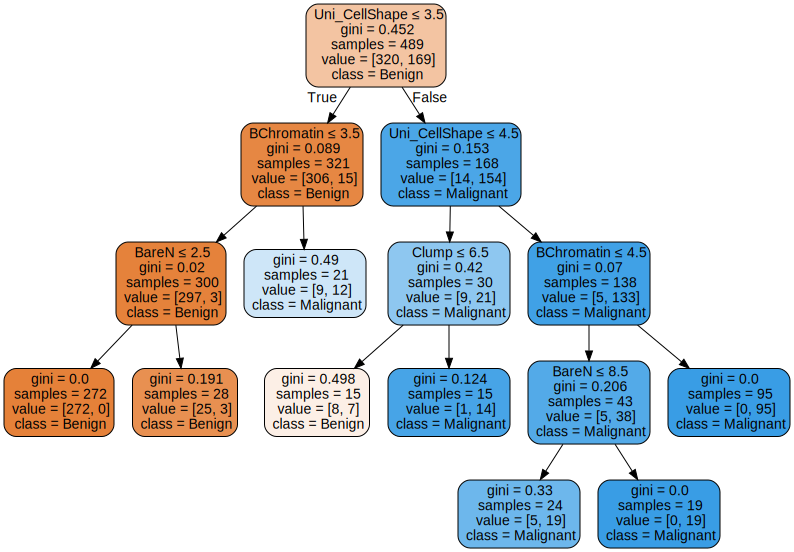

In [26]:
best_model = cv.best_estimator_
from sklearn import tree
dot_data = tree.export_graphviz(best_model, out_file=None,
                         feature_names=X.columns,
                         class_names=['Benign','Malignant'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [ ]:
#OR


In [ ]:
best_model = cv.best_estimator_
tree.plot_tree(best_model,feature_names=X.columns,
               class_names=['Benign','Malignant'],
               filled=True,fontsize=5)


In [27]:
########################################################
import matplotlib.pyplot as plt


In [28]:
print(best_model.feature_importances_)


[0.01734883 0.         0.90470739 0.         0.         0.00798435
 0.06995943 0.         0.        ]


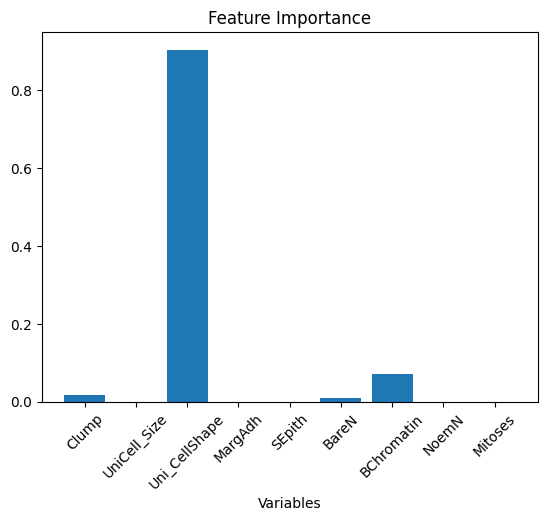

In [29]:
ind = np.arange(9)
plt.bar(ind,best_model.feature_importances_)
plt.xticks(ind,(X.columns),rotation=45)
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()
#######################################################